# Project Demo File

## Introduction
Using data from Resources for the Future, we are creating a machine learning program that predicts the economic status of a region based on the energy usage in the region. The three specific types of energy production we are looking at are coal, oil, and natural gas. For economic status, regions are labeled from 1-4, with 4 being the highest economic status. 

Here are the modules that we will be needing for this project. 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import tree, preprocessing
import numpy as np
from model import model 

First, we need to create an object of the model class with the data from the excel sheet.  

In [2]:
energy = model("Top_energy_counties_output_20211216.xlsx", "Output")

The trimData( ) function trims the data to only contain the specified columns that we want to look at. This also deletes any data points where cpr, opr, or ngp have a value of 0. 

In [3]:
energy.trimData(["cpr", "opr", "ngp", "ecd"])

Using the getData( ) function, we can display the data we are going to train our model with. 

In [4]:
energy.getData()

,cpr,opr,ngp,ecd
67,658,1.575600e+04,2.744469e+08,1
72,2544,4.562400e+04,5.823900e+04,1
266,4079,3.750000e+02,4.293295e+06,1
485,2035,3.574733e+06,5.440536e+07,2
672,3552,3.335850e+05,9.692687e+06,2
...,...,...,...,...
3093,13006,4.004297e+03,3.576709e+07,3
3108,243773,2.044743e+07,8.053247e+07,2
3113,6828,5.792549e+06,2.113770e+08,1
3124,23243,3.316475e+07,1.142279e+08,1


The trainModel( ) function drops the target column from the data, which is "ecd," and then fit transforms the target column using label encoding. This function also takes in test size and maximum depth in order to split and create the train and test data. 

In [5]:
energy.trainModel("ecd", testSize = 0.8, maxDepth = 30)

DecisionTreeClassifier(max_depth=30)

Example of exception handling for trainModel( ) where testSize must be a float. 

In [6]:
energy.trainModel("ecd", testSize = 1, maxDepth = 50)

TypeError: Test size needs to be type float

Example of exception handling where maxDepth must be an integer. 

In [7]:
energy.trainModel("ecd", testSize = 0.8, maxDepth = 30.5)

TypeError: Max Depth needs to be in a type int

The scoreTree( ) function prints the score for both the training and testing trees for our model. 

In [8]:
energy.scoreTree()

The score for the training data is: 1.0
The score for the testing data is: 0.43283582089552236


Now, we want to see how the scores are affected by changing testSize and maxDepth values.

These are the scores when testSize is adjusted to be a smaller value.

In [9]:
energy.trainModel("ecd", testSize = 0.2, maxDepth = 30)
energy.scoreTree()

The score for the training data is: 1.0
The score for the testing data is: 0.35294117647058826


These are the scores when the maxDepth is smaller.

In [10]:
energy.trainModel("ecd", testSize = 0.8, maxDepth = 5)
energy.scoreTree()

The score for the training data is: 0.9375
The score for the testing data is: 0.26865671641791045


These are the scores when both testSize and maxDepth are adjusted to be smaller. 

In [11]:
energy.trainModel("ecd", testSize = 0.2, maxDepth = 5)
energy.scoreTree()

The score for the training data is: 0.8636363636363636
The score for the testing data is: 0.4117647058823529


We notice that a higher testSize and maxDepth correlates to a higher score for both training and testing data. We will be creating a visual representation of the decision tree for this model. 

In [12]:
energy.trainModel("ecd", testSize = 0.8, maxDepth = 30)

DecisionTreeClassifier(max_depth=30)

The visualizeTree( ) function displays a visual model for the decision tree for the trained data. 

In [13]:
def visualizeTree(self):
    '''
    Shows a visual model of the generated tree

    Args:
        none

    Return:
        none
    '''
    fig, ax = plt.subplots(1, figsize = (20, 20))
    tree.plot_tree(self.T, filled = True, feature_names = self.X.columns)
    plt.title("Generated Decision Tree")

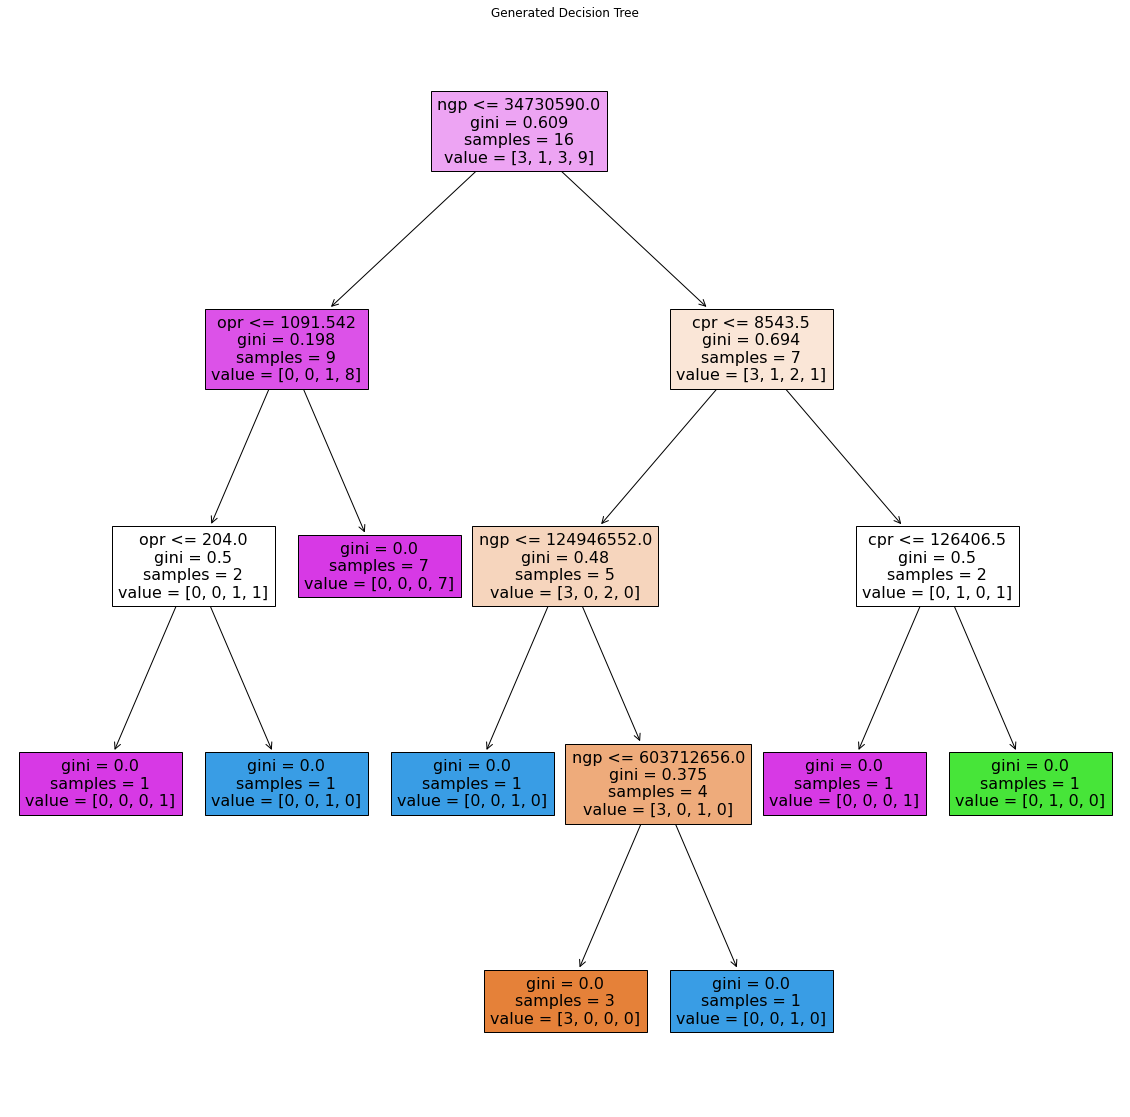

In [14]:
visualizeTree(energy)

## Conclusion 

In general, our model has overfitting issues using the chosen predictor variables. Using sources of energy does not appear to be a good way of predicting economic status. In order to improve our model, we could incorporate other columns of the data into our predictor variables. 